<a href="https://colab.research.google.com/github/marcelochavesoficial/Sigmoidal-Data-Science/blob/main/Project_1_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
`# This is formatted as code`
```

**Airbnb Data Analysis - Broward County - Florida**

   Airbnb is a online marketplace that enables people to list, find, and rent short-term lodging, primarily homestays, or tourism experiences. 
   
   Founded in 2008, it has grown to become one of the largest providers of alternative accommodation worldwide. Airbnb allows hosts to rent out their homes, apartments, or other properties to guests, and guests can search for lodging using the platform's website or mobile app. 
   
   The company makes money by charging guests a service fee and hosts a host fee. It is headquartered in San Francisco, California.
   
   Through the Inside Airbnb portal, it is possible to download a large amount of data to develop Data Science projects and solutions.
   
   In this notebook, we'll analyze data from Broward County, Florida and see what insights can be extracted from the raw data.

**Obtaining Data**

All data used here was obtained from the Inside Airbnb website.
For this initial exploratory analysis, only the following file will be downloaded:

listings.csv - Summary information and metrics for listings in Broward County (good for visualizations).

Important: The portal is in constant evolution, and at some point, the exact dataset used in this notebook may no longer be available, which would break our code.

Because of this, we provide here the set we use, so that you can always use this material.
With that in mind, let's get to the project.

In [ ]:
# Import the necessary packages:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Import CSV file into a DataFrame:
df = pd.read_csv("http://data.insideairbnb.com/united-states/fl/broward-county/2022-12-28/visualisations/listings.csv") 

**Data analysis**

This step aims to create an initial situational awareness and allow an understanding of how the data is structured.

**Dictionary of variables**

- id - id number generated to identify the property

- name - name of advertised property

- host_id - property owner 

- host_name - Host name

- neighborhood_group - this column does not contain any valid values

- neighborhood - neighborhood name

- latitude - latitude coordinate of the property

- longitude - longitude coordinate of the property

- room_type - informs the type of room offered

- price - price to rent the property

- minimum_nights - minimum number of nights to book

- number_of_reviews - number of reviews the property has

- last_review - date of the last review

- reviews_per_month - number of reviews per month

- calculated_host_listings_count - number of properties from the same host

- availability_365 - number of days of availability within 365 days

Before starting any analysis, let's check the face of our dataset by analyzing the first 5 entries.

In [ ]:
# Show the first 5 entries:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,83449,MARY POP APTS 2/1 APT SLEEP 5,454736,"Jon, Mary Pop Apartments",NaN,Dania Beach,26.03392,-80.14201,Entire home/apt,99,7,23,2022-12-08,0.17,8,0,3,NaN
1,69824,2 bd/2ba Oceanfront Condo,351303,Tracy,NaN,Hallandale Beach,25.97641,-80.12052,Entire home/apt,150,30,3,2022-08-15,0.05,2,276,1,NaN
2,191160,Tropical Beach Paradise Awaits You,924482,Dan,NaN,Deerfield Beach,26.30707,-80.07793,Entire home/apt,119,2,25,2019-11-08,0.19,1,87,0,NaN
3,129099,MIAMI - AMAZING APARTMENT OCEANVIEW,637272,Bianca,NaN,Hollywood,25.99416,-80.11969,Entire home/apt,225,28,27,2022-07-01,0.20,6,338,2,NaN
4,129061,MIAMI - LUXURY APARTMENT OVER BEACH,637272,Bianca,NaN,Hollywood,25.99332,-80.11887,Entire home/apt,261,28,21,2022-03-27,0.15,6,336,2,NaN


**Q1. How many attributes (variables) and how many entries does our dataset have? What are the types of variables?**

Let's go ahead and identify how many entries our dataset has and see the types of each column.

This dataset we downloaded is a short version of Airbnb. On the same page we download the listings.csv file. There is a more complete version with 35847 entries and 106 variables (listings.csv.gz).

In [ ]:
# Identify the data volume of the DataFrame:
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# Check the first 5 entries of the DataSet:
display(df.dtypes)

Entradas:	 16478
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

**Q2. What percentage of values ​​are missing from the dataset?**

The quality of a dataset is directly related to the amount of missing values. It's important to understand early on whether these null values ​​are significant compared to the total entries.

- You can see that the neighborhood_group column has 100% of its values ​​missing.

- The variables reviews_per_month and last_review have null values ​​in almost half of the rows.

- The name and host_name variables have approximately 0.1% of null values.

In [ ]:
# Sort variables by their missing values ​​in descending order:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)  

license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.205243
last_review                       0.205243
host_name                         0.000061
name                              0.000061
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

**Q3. What is the type of distribution of the variables?**

To identify the distribution of variables, I will plot the histogram.

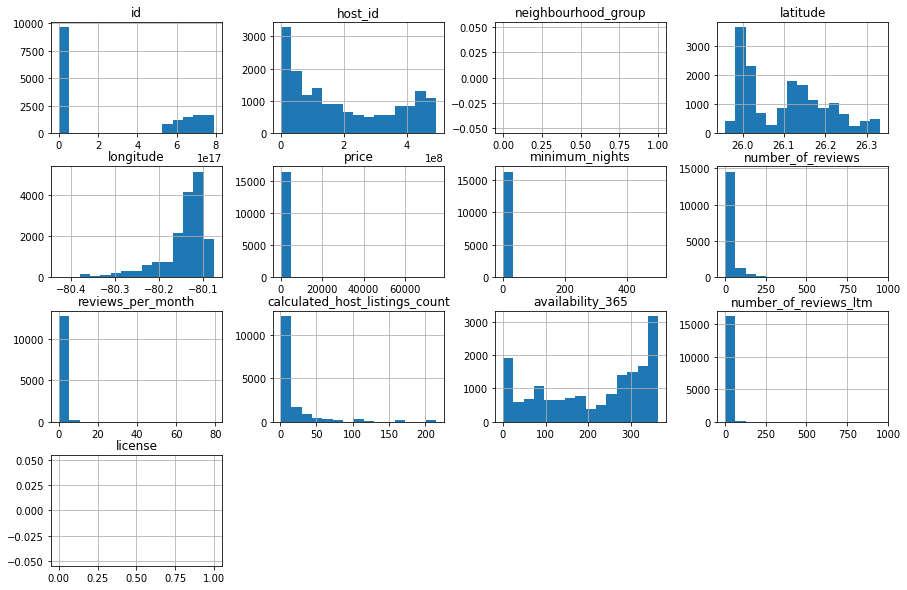

In [ ]:
# Plot the histogram of numerical variables:
df.hist(bins=15, figsize=(15,10));

**Q4. Are there outliers present?**

By the distribution of the histogram, it is possible to verify evidence of the presence of outliers. Look for example the variables price, minimum_nights and calculated_host_listings_count.

The values ​​do not follow a distribution, and distort the entire graphical representation. To confirm, there are two quick ways to help detect outliers. Are they:
Statistical summary via describe() method
Plot boxplots for the variable.

In [ ]:
# View summary statistics of numeric variables:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,16478.000000,16478.000000,16478.000000,13096.000000,16478.000000,16478.000000
mean,392.038233,5.254157,26.483493,1.560303,17.458065,212.649351
std,1136.088084,17.333348,50.970229,1.788142,34.912478,125.161708
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,130.000000,1.000000,1.000000,0.470000,1.000000,92.000000
50%,214.500000,2.000000,8.000000,1.110000,4.000000,255.000000
75%,396.000000,3.000000,30.000000,2.220000,16.000000,328.000000
max,75150.000000,500.000000,953.000000,79.420000,215.000000,365.000000


Looking at the statistical summary above, we can confirm some hypotheses such as:

- The price variable has 75% of the value below 529, but its maximum value is 623592.

- The minimum number of nights (minimum_nights) is above 365 days in the year.

Boxplot for minimum_nights

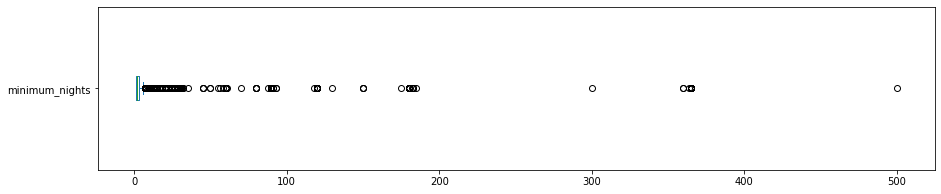

minimum_nights: valores acima de 30:
257 entradas
{:.4f}% 1.559655297973055


In [ ]:
# Minimum nights:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# See amount of values ​​above 30 days for minimum_nights:
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%",format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))


**Boxplot for price**

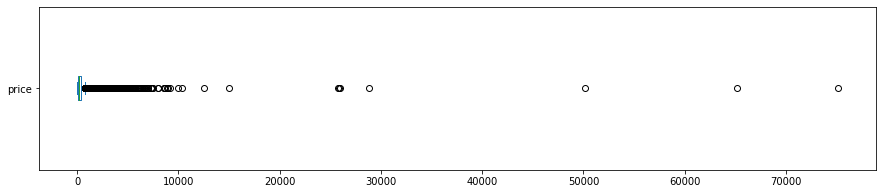


price: valores acima de 1500
515 entradas
3.1254%


In [ ]:
# Price:
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# See amount of values ​​above 1500 for price:
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

*Histograms without outliers*

Since we identified outliers in the price and minimum_nights variables, let's now clear their DataFrame and replot the histogram.

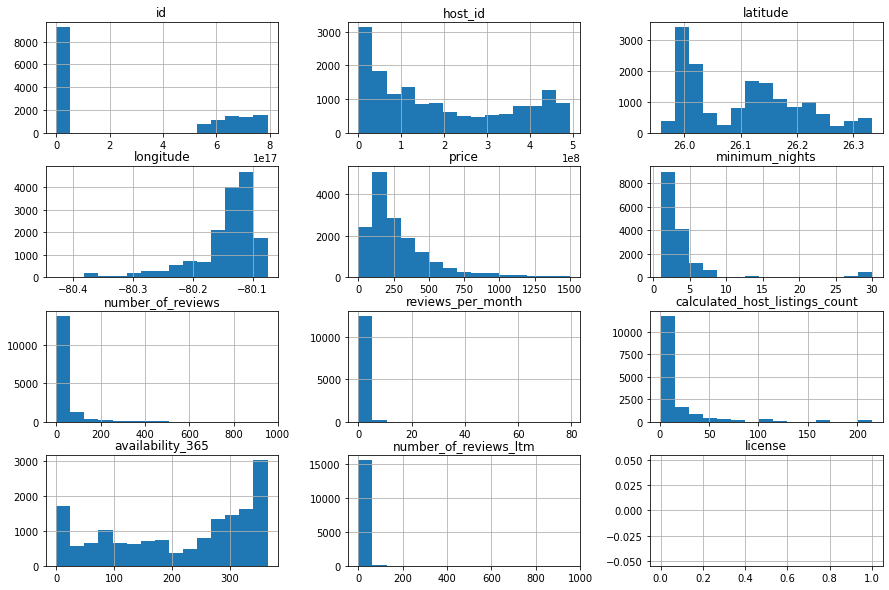

In [ ]:
# Remove the *outliers* in a new DataFrame:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# Remove 'neighborhood_group' as it is empty:
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# Plot the histogram for numeric variables:
df_clean.hist(bins=15, figsize=(15, 10));


**Q4. What is the correlation between the variables**

Correlation means that there is a relationship between two things. In our context, we are looking for a relationship or similarity between two variables.

This relationship can be measured, and it is a function of the correlation coefficient to establish how strong it is. To identify existing correlations between the variables of interest, I will:

- Create a correlation matrix

- Generate a heatmap from this matrix, using the seaborn library

In [ ]:
# Create a correlation matrix:
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
   'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.050475,-0.098083,-0.060962,0.060810,0.103569
minimum_nights,-0.050475,1.000000,-0.109298,-0.182422,-0.044066,-0.013746
number_of_reviews,-0.098083,-0.109298,1.000000,0.587107,-0.059510,-0.027710
reviews_per_month,-0.060962,-0.182422,0.587107,1.000000,-0.073267,0.025326
calculated_host_listings_count,0.060810,-0.044066,-0.059510,-0.073267,1.000000,0.144025
availability_365,0.103569,-0.013746,-0.027710,0.025326,0.144025,1.000000


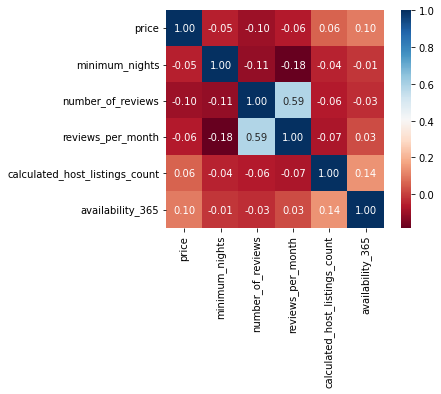

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

**Q5. What type of property is most rented on Airbnb?**

The column of the room_type variable indicates the type of rental that is advertised on Airbnb. If you've already rented on the site, you know that there are options for apartments/whole houses, just renting a room or even sharing a room with other people.

Let's count the number of occurrences of each type of lease, using the value_counts() method.

In [ ]:
# Show the amount of each type of property available:
df_clean.room_type.value_counts()


Entire home/apt    13191
Private room        2336
Shared room          128
Hotel room            54
Name: room_type, dtype: int64

In [ ]:
# Show the percentage of each property type available:
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.839710
Private room       0.148705
Shared room        0.008148
Hotel room         0.003438
Name: room_type, dtype: float64

**Q6. What is the most expensive location in Broward County?**

One way to check one variable against another is by using groupby(). In this case, we want to compare the neighborhoods (neighbourhoods) based on the rental price.

In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Tribal Land                 792.666667
Lazy Lake                   663.666667
Lighthouse Point            510.903614
Hillsboro Beach             450.153846
Southwest Ranches           448.173913
County Regional Facility    430.181818
Plantation                  349.773481
Lauderdale By The Sea       336.258824
Hollywood                   318.588279
Sea Ranch Lakes             314.500000
Name: price, dtype: float64

Above, we see that neighborhoods like Plantation and Hollywood are averaging higher prices than places like Fort Lauderdale.

A person unfamiliar with Broward County could present these results without question. Just to give a single example of how unrepresentative a sample can be, look at how many entries there are for Coral Springs.

In [ ]:
# See the amount of properties in Coral Springs:
print(df_clean[df_clean.neighbourhood == "Coral Springs"].shape)

# See the ten Coral Springs entries:
df_clean[df_clean.neighbourhood == "Coral Springs"]


(78, 17)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
362,6334410,Cheerful 1 bedroom in a house w/ private bath.,28311171,Kalowtie,Coral Springs,26.27232,-80.27003,Private room,82,1,3,2022-10-12,0.37,2,364,3,NaN
498,9403844,Spacious room,48767315,Paulina,Coral Springs,26.28574,-80.27665,Private room,61,2,45,2018-05-03,0.53,3,86,0,NaN
503,10184906,Cozy room with full-size bed.,48767315,Paulina,Coral Springs,26.28478,-80.27670,Private room,39,2,17,2017-03-31,0.20,3,82,0,NaN
1122,16925206,Charming room,48767315,Paulina,Coral Springs,26.28570,-80.27680,Private room,35,2,7,2017-03-25,0.10,3,79,0,NaN
1305,19335355,"Cozy Master Bedroom in Coral Springs, FL",135452636,Tisha-Ann,Coral Springs,26.26786,-80.28221,Private room,34,1,37,2021-05-05,0.56,2,271,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15949,774525138647555617,Modern Oasis for a Long Stay,139165857,Sean,Coral Springs,26.27931,-80.27521,Private room,66,7,0,NaN,NaN,1,194,0,NaN
15994,770263566382156046,Beautiful Modern 3/2 Condo,483331952,Anthony,Coral Springs,26.24292,-80.24284,Entire home/apt,210,1,0,NaN,NaN,1,355,0,NaN
16009,773141671976104598,Luminoso apartamento,491492682,Augusto,Coral Springs,26.26305,-80.23431,Entire home/apt,78,1,1,2022-12-18,1.00,1,85,1,NaN
16095,776131557301766842,Luxurious 5 bdrm w/heated pool,490487212,Paul,Coral Springs,26.25529,-80.24662,Entire home/apt,360,2,0,NaN,NaN,1,320,0,NaN


Since Latitudes and Longitudes are provided for the properties, it is possible to plot each point. For this, consider x=longitude and y=latitude.

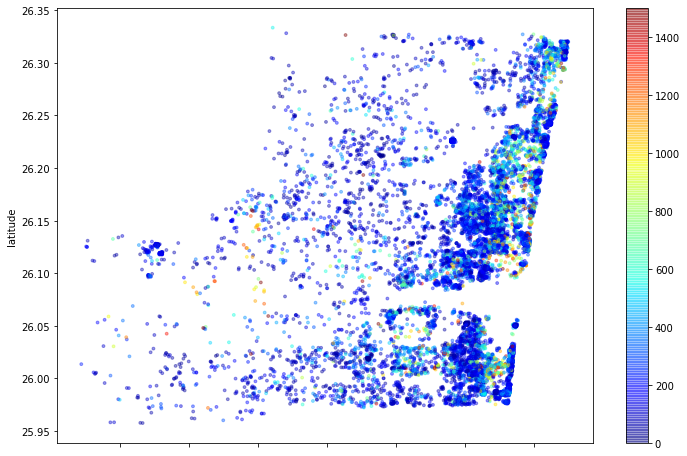

In [ ]:
# Plot properties by latitude-longitude:
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

**Q7. What is the average minimum numbers of nights for rent?**

In [ ]:
# View the column average 'minimum nights:
mean_minimum_nights = df["minimum_nights"].mean()

print(mean_minimum_nights)


5.254157057895376


**Conclusions**

Only a superficial analysis was carried out on the Airbnb database, but it has already been noticed that there are outliers in some of the variables.

It was also noted that in some locations there are few properties available, which can distort the statistical information of some attributes.

Finally, remember that this dataset is a short version, ideal only for an initial approach. It is recommended that, in a future exploratory analysis, the complete data set be used, with 106 attributes available.